# Hashtag distribution

Metode EDA yang digunakan:
* Countplot: untuk menghitung jumlah hashtag tertentu dan di visualisasikan dengan menggunakan histogram
* Wordcloud: untuk melakukan visualisasi pada frekuensi hashtag secara lebih informatif dan memperlihatkan hashtag" yang paling banyak muncul

Metode Statistika yang digunakan: 
* Descriptive statistics: untuk memberikan gambaran deskriptif mengenai data hashtag, seperti nilai rata-rata, median, modus, dan rentang data.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

In [2]:
def fix_word(text):
    return ' '.join([kamus_dict[word] if word in kamus_dict else word for word in text.split(' ')])

In [3]:
def remove_unnecessaryChar(text):
     text = re.sub(r'&amp;|amp;|&', 'dan', text)
     text = re.sub(r'\\n+', '', text)
     text = re.sub('&lt;/?[a-z]+&gt;', ' ', text)
     text = re.sub(r'#+','#', text)
     text = re.sub(r'http\S+',' ',text)
     text = re.sub(r'(USER+\s?|RT+\s?|URL+\s?)', ' ', text)
     text = re.sub(r'x[a-zA-Z0-9]+', ' ', text)
     return text

In [4]:
def remove_punctuation(text):
     text = re.sub(r'\?', '', text)
     text = re.sub(r'[^a-zA-Z0-9#%]+', ' ', text)
     text = re.sub(r' +', ' ', text.lower().lstrip("0123456789").strip())
     return text

In [5]:
def preprocessing(text):
     text = remove_unnecessaryChar(text)
     text = remove_punctuation(text)
     text = fix_word(text)
     return text

In [6]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df["Tweet"] = df["Tweet"].str.encode('ascii', 'ignore').str.decode('ascii')
kamus = pd.read_csv('new_kamusalay.csv', names=['old','new'], encoding='ISO-8859-1')
kamus_dict = dict(zip(kamus['old'], kamus['new']))

df["hasil"] = df["Tweet"].apply(preprocessing)
df.replace('', pd.NA, inplace=True)
df.dropna(inplace=True)

final = pd.DataFrame({'Tweet':df["hasil"]})
# final.to_csv('try.csv')

# Descriptive Stastistics
## Keterangan 
* Total number of hashtags: Jumlah total hashtag yang ditemukan pada data tweets.
* Number of unique hashtags: Jumlah hashtag yang unik(tidak ada duplikat) yang ditemukan pada data tweets.
* Top 20 hashtags: Hashtag yang paling banyak muncul pada data tweets.
* Top 20 hashtags count: Jumlah kemunculan dari hashtag yang paling banyak muncul pada data tweets.
* Count: Jumlah hashtag yang dihitung dalam analisis hashtag.
* Mean: Rata-rata jumlah kemunculan dari hashtag pada data tweets.
* Standard Deviation: Tingkat sebaran data dari jumlah kemunculan hashtag pada data tweets.
* Minimum Value: Jumlah kemunculan hashtag terkecil pada data tweets.
* Maximum Value: Jumlah kemunculan hashtag terbanyak pada data tweets.
* Q1: Kuartil pertama dari jumlah kemunculan hashtag pada data tweets, yang menunjukkan bahwa 25% hashtag memiliki kemunculan sebesar atau kurang dari nilai ini.
* Q2: Kuartil kedua dari jumlah kemunculan hashtag pada data tweets atau median, yang menunjukkan bahwa 50% hashtag memiliki kemunculan sebesar atau kurang dari nilai ini.
* Q3: Kuartil ketiga dari jumlah kemunculan hashtag pada data tweets, yang menunjukkan bahwa 75% hashtag memiliki kemunculan sebesar atau kurang dari nilai ini.

## Penjelasan 

Hasil dari descriptive statistics yang telah dilakukan menunjukkan bahwa terdapat 2539 hashtag yang ditemukan pada data. Dari keseluruhan hashtag yang ada, hanya ada 1262 hashtag yang unik/tidak duplikat.

Hashtag yang paling banyak digunakan berjumlah 342 dan hashtag yang paling sedikit digunakan berjumlah 7. Hashtag yang paling banyak digunakan adalah "#2019gantipresiden" yang muncul sebanyak 342 kali pada data. Sedangkan hashtag yang paling sedikit digunakan muncul sebanyak 7 kali.

Rata-rata jumlah penggunaan hashtag adalah 24.97 dan standar deviasi sebesar 59.47, yang menunjukkan bahwa distribusi penggunaan hashtag pada dataset tersebut cukup bervariasi dan terdapat cukup banyak variasi pada frekuensi penggunaannya.

Kuartil pertama (Q1) menunjukkan bahwa 25% dari hashtag yang muncul pada dataset digunakan sebanyak 9 kali atau kurang. Kuartil kedua (Q2) menunjukkan bahwa 50% dari hashtag yang muncul pada dataset digunakan sebanyak 10 kali atau kurang. Kuartil ketiga (Q3) menunjukkan bahwa 75% dari hashtag yang muncul pada dataset digunakan sebanyak 18.5 kali atau kurang.

In [7]:
hashtags = final['Tweet'].str.findall(r'#\w+')
hashtags = [item.lower() for sublist in hashtags for item in sublist]

total_hashtags = len(hashtags)
unique_hashtags = len(set(hashtags))
top_n = 30
hashtag_counts = Counter(hashtags).most_common(top_n)
hashtags = [x[0] for x in hashtag_counts]
counts = [x[1] for x in hashtag_counts]
print(hashtag_counts)

count = len(counts)
mean = np.mean(counts)
std_dev = np.std(counts)
min_val = np.min(counts)
max_val = np.max(counts)
q1 = np.percentile(counts, 25)
q2 = np.percentile(counts, 50)
q3 = np.percentile(counts, 75)

# Print descriptive statistics
print('--------------------------------------------')
print('Descriptive Statistics for Hashtag Analysis:')
print('--------------------------------------------')
print('Total number of hashtags:', total_hashtags)
print('Number of unique hashtags:', unique_hashtags)
print('Top', top_n, 'hashtags:', hashtags)
print('Top', top_n, 'hashtags count:', counts)
print('Count:', count)
print('Mean:', mean)
print('Standard Deviation:', std_dev)
print('Minimum Value:', min_val)
print('Maximum Value:', max_val)
print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)

[('#2019gantipresiden', 342), ('#sebabaduy2018', 45), ('#2019presidenbaru', 31), ('#ngentot', 29), ('#asyikm3nang', 21), ('#kontol', 21), ('#2019tetapjokowi', 20), ('#debatfinalpilkadajkt', 19), ('#freeport51', 17), ('#memek', 17), ('#sange', 13), ('#kamiganjaryasin', 11), ('#iklanahokjahat', 11), ('#kuchat', 11), ('#ganjaryasin1', 10), ('#bokep', 10), ('#tomohoninternationalflowerfestival', 10), ('#khofifahemiljatimsatu', 10), ('#rakyatb3rsamajkw', 9), ('#hauzminiquiz', 9), ('#asiangames2018', 9), ('#pdiperjuangan', 9), ('#indonesia', 9), ('#bahancoli', 9), ('#gubernurzamannow', 8), ('#djarotsihar2', 8), ('#ratas', 8), ('#jokowipacupromosiasiangames', 8), ('#matanajwadebatjakarta', 8), ('#cakiminthene', 7)]
--------------------------------------------
Descriptive Statistics for Hashtag Analysis:
--------------------------------------------
Total number of hashtags: 2539
Number of unique hashtags: 1262
Top 30 hashtags: ['#2019gantipresiden', '#sebabaduy2018', '#2019presidenbaru', '#nge

# Visualization

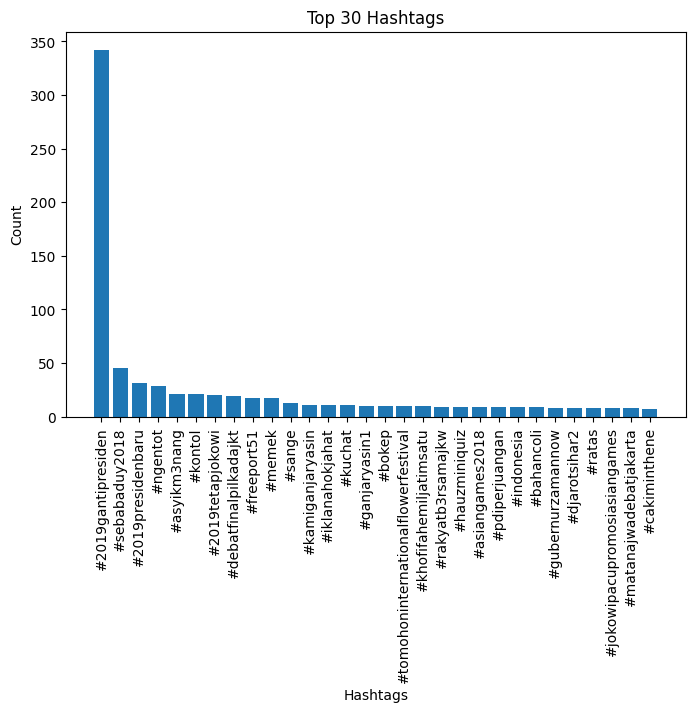

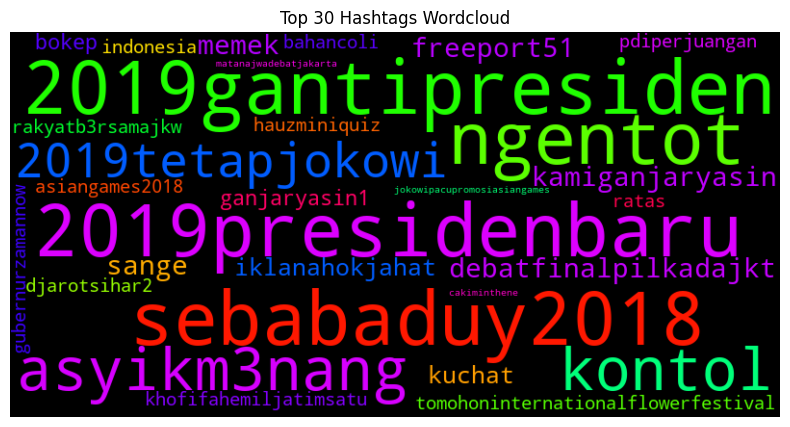

In [8]:
plt.figure(figsize=(8,5))
plt.bar(hashtags, counts)
plt.title('Top 30 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot wordcloud
plt.figure(figsize=(10,5))
text = ' '.join(hashtags)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='hsv', max_words=30).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 30 Hashtags Wordcloud')
plt.axis('off')
plt.show()